# Create your first plots

Imagine that you have acquired some microscopy data. First you import those as Numpy arrays. We do that here by using scikit-image and an online dataset but you are free to import your data as you want:

In [1]:
import skimage.io

In [2]:
image = skimage.io.imread('https://github.com/guiwitz/microfilm/raw/master/demodata/coli_nucl_ori_ter.tif')
image.shape

(3, 30, 220, 169)

We have an image with 3 channels and 30 time points. To create a simple plot, we only take the first time point:

In [3]:
image_t0 = image[:,0,:,:]

Now we can import the microfilm package. For simple plots, we only need the ```microshow``` function of the ```microfilm.microplot``` submodule:

In [4]:
from microfilm.microplot import microshow

Plotting a color composite image of our numpy array is now as easy as using:

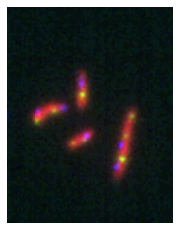

In [5]:
microshow(image_t0);

With a few options more we can change the colormaps and add information on the figure:

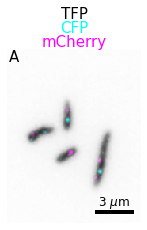

In [6]:
microshow(image_t0, cmaps=['Greys','pure_cyan','pure_magenta'], flip_map=False,
                              label_text='A', label_color='black', channel_label_show=True, channel_names=['TFP','CFP','mCherry'],
                              unit='um', scalebar_unit_per_pix=0.06, scalebar_size_in_units=3, scalebar_color='black', scalebar_font_size=0.05);

In addition to single plots, you can also create panels and animations. For that, we first import additional parts of the package. The panel object:

In [7]:
from microfilm.microplot import Micropanel

And the animation module:

In [8]:
from microfilm.microanim import Microanim

Let's first look at panels. Imagine that you want to display the two channels separately in a figure. You first start by creating each element of your figure and adjust it as you want:

In [9]:
from microfilm.microplot import Microimage

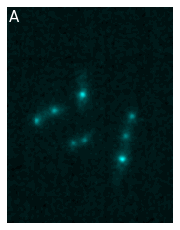

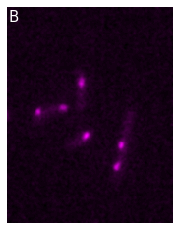

In [10]:
microim1 = microshow(image_t0[1], cmaps='pure_cyan', label_text='A', channel_names='CFP')
microim2 = microshow(image_t0[2], cmaps='pure_magenta', label_text='B', channel_names='mCherry')

And now you create your panel, specifying the grid that you want and using the ```add_element``` method to add each of your figure to the panel object:

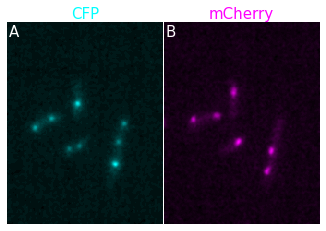

In [11]:
panel = Micropanel(rows=1, cols=2, figscaling=3)
panel.add_element([0,0], microim1);
panel.add_element([0,1], microim2);
panel.add_channel_label()

```microfilm``` takes care of setting the figure at the right size, avoiding blank, space, adjusting the labels etc.

Finally, with almost the same commands, you can create an animation object. Now, you have to provide the compelete array and not just a singe time point. In a Jupyter notebook, you can create an interactive figure, but here we just create the animation, save it and reload it.

We create the animation in three steps:
- first we create an animation object with the same options as used for a regular figure (we use only two channels here)
- second we add a time-stamp with the specific ```add_time_stamp``` method
- third we save the animation as a gif

[WARNING: _io: 411 2021-10-04 00:04:20,723] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (276, 360) to (288, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


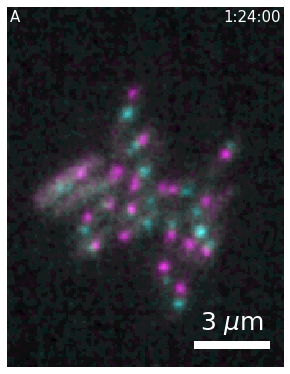

In [14]:
anim = Microanim(
    image[[1,2],:, :,:], cmaps=['pure_cyan','pure_magenta'], flip_map=False, fig_scaling=5,
    label_text='A', unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=3, scalebar_font_size=0.05)
anim.add_time_stamp(unit='MM', unit_per_frame=3, location='upper right')
anim.save_movie('first_anim.mp4', quality=9)

In [15]:
from IPython.display import Video
Video('https://github.com/guiwitz/microfilm/raw/master/docs/first_anim.mp4')

## Next steps

You can find more details on how to create these plots and the fucntions of the module in [this more in-depth guide](../notebooks/create_plots.ipynb).

You can also discover how to go beyone single plots:
- [if you have time-lapse data you can animate such plots and export them as movies](../notebooks/create_animations.ipynb)
- [you can combine multiple plots into a figure with several panels](../notebooks/create_panels.ipynb)